# Read and plot skewer outputs from CoLoRe

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

In [3]:
#Open data file (test file with few quasars)
hdulist = fits.open('../example_data/raw_colore/N1000_out_srcs_s0_15.fits')
hdulist.info()

Filename: ../example_data/raw_colore/N1000_out_srcs_s0_15.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       6   ()      
  1  CATALOG       1 BinTableHDU     24   1000R x 5C   [1J, 1E, 1E, 1E, 1E]   
  2  DENSITY SKEWERS    1 ImageHDU         8   (1979, 1000)   float32   
  3  VELOCITY SKEWERS    1 ImageHDU         8   (1979, 1000)   float32   
  4  BACKGROUND COSMOLOGY    1 BinTableHDU     21   1979R x 4C   [1E, 1E, 1E, 1E]   


In [15]:
# get information about quasars (TYPE,RA,DEC,Z_COSMO,DZ_RSD)
catalog = hdulist[1].data
z_qso = catalog['Z_COSMO']
Nq = len(z_qso)
print('# quasars =',Nq)
print(np.min(z_qso),'< z_qso <',np.max(z_qso))

# quasars = 1000
0.139725 < z_qso < 3.48193


In [8]:
# get arraw with redshift in each cell of grid
z = hdulist[4].data['Z']
Nz=len(z)
print('# cells in grid =',Nz)
print(z[0],'< z <',z[-1])

# cells in grid = 1979
0.000400246 < z < 3.4825


In [9]:
# Get deltas (fluctuation around mean density) and line of sight velocity (actually, dz)
deltas = hdulist[2].data
velocities = hdulist[3].data
print(deltas.shape)
print('mean delta',np.mean(deltas))
print(np.min(deltas),'< delta <',np.max(deltas))

(1000, 1979)
mean delta 0.038736
-0.993948 < delta < 107.852


In [10]:
# identify quasars with highest redshift, and get its delta and velocity
id = np.argmax(z_qso)
delta = deltas[id]
velocity = velocities[id]

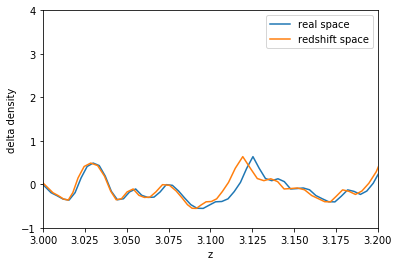

In [11]:
# plot delta for highest-z quasar skewer, vs redshift
plt.xlim(3.0,3.2)
plt.ylim(-1,4)
plt.xlabel('z')
plt.ylabel('delta density')
plt.plot(z,delta,label='real space')
plt.plot(z-velocity,delta,label='redshift space')
plt.legend()